<a href="https://colab.research.google.com/github/deshmukhpranoti/Percentage_Predictor/blob/master/TSF_TASK_1_Percentage_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Task 1: Prediction using supervised ML**
 

###**Case study: Predict the percentage of student based on number of study hours**

###**Importing libraries**

In [3]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###**Acquire the data**

In [5]:
#To read the csv file
df=pd.read_csv('percentage_prediction1.csv')

In [6]:
#Prints first five datapoints of dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
#Prints last five datapoints of dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
#To view information about datapoints
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#To view basic statistical details
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###**Data Visualization**


Text(0.5, 1.0, ' Scatter plot of student study hours Vs student scores')

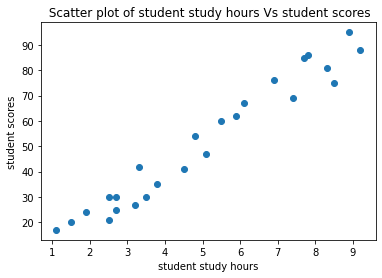

In [10]:
#Scatter plot
plt.scatter(x=df.Hours,y=df.Scores)
plt.xlabel('student study hours')
plt.ylabel('student scores')
plt.title(' Scatter plot of student study hours Vs student scores')

In [11]:
#checking the null values
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


###**Train Test Split**


In [12]:
#Split the dependent and independent variables
X=df.drop('Scores',axis=1)
y=df.drop('Hours',axis=1)

In [13]:
#To print number of rows and columns
print("shape of x: ",X.shape)
print("shape of y: ",y.shape)

shape of x:  (25, 1)
shape of y:  (25, 1)


In [14]:
#split the data into a training set(80%) and a testing set(20%)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size = 0.2,random_state=8)
X_test


,Hours
18,6.1
14,1.1
4,3.5
22,3.8
0,2.5


In [15]:
y_test

,Scores
18,67
14,17
4,30
22,35
0,21


In [16]:
print("shape of X_train: ",X_train.shape)
print("shape of y_train: ",y_train.shape)
print("shape of X_test: ",X_test.shape)
print("shape of y_test: ",y_test.shape)


shape of X_train:  (20, 1)
shape of y_train:  (20, 1)
shape of X_test:  (5, 1)
shape of y_test:  (5, 1)


###**Train the Model**

In [17]:
#Train the model using linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression() 
result = model.fit(X_train, y_train) 

###**Test the Model**

In [18]:
#Test the model
predictions = result.predict(X_test) 
predictions

array([[62.40921319],
       [14.53174465],
       [37.51292955],
       [40.38557766],
       [27.93743584]])

In [19]:
#To compare the original marks and the marks predicted by our model 
pd.DataFrame(np.c_[X_test, y_test,predictions], columns=["student study hours","student marks original","student marks predicted"])

,student study hours,student marks original,student marks predicted
0,6.1,67.0,62.409213
1,1.1,17.0,14.531745
2,3.5,30.0,37.512930
3,3.8,35.0,40.385578
4,2.5,21.0,27.937436


###**Performance**

In [20]:
#Measure performance by using r^2 of regression.
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.8972223905569089

###**Deploy the Model**

In [24]:
#predicted score if a student studies for 9.25 hrs/day
pred_new=result.predict([[9.25]])[0][0].round(2)
pred_new

92.57

In [30]:
#predicted score if a student studies for 6 hrs/day
pred_new=result.predict([[6]])[0][0].round(2)
pred_new

61.45